In [6]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# GSEA和ORA分析相关库
try:
    import gseapy as gp
    GSEA_AVAILABLE = True
    print("gseapy库可用，将执行GSEA和ORA分析")
except ImportError:
    print("警告: gseapy库未安装，GSEA和ORA分析将被跳过")
    print("安装命令: pip install gseapy")
    GSEA_AVAILABLE = False

# 设置matplotlib使用Arial字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

gseapy库可用，将执行GSEA和ORA分析


In [7]:

print("\n" + "="*60)
print("Cell 0: 基础数据加载和分组")
print("="*60)
# 环境设置
import umap
from sklearn.preprocessing import StandardScaler
# 设置matplotlib使用Arial字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

print("环境设置完成")
# 数据读取
try:
    df = pd.read_csv(
        r"data/Spectronaut_Output-Result.tsv",
        sep="\t"
    )
    print(f"数据读取成功，原始形状: {df.shape}")
except FileNotFoundError:
    print("数据文件未找到，请检查路径: data/Spectronaut_Output-Result.tsv")
    exit()
# 设置蛋白为行名
df = df.set_index("PG.ProteinGroups")
print(f"设置蛋白为行名后形状: {df.shape}")
# 只保留Log2Quantity列
log2_df = df.loc[:, df.columns.str.contains("PG.Log2Quantity")]
print(f"保留Log2Quantity列后形状: {log2_df.shape}")
print(f"Log2Quantity列数量: {len(log2_df.columns)}")
# 实验设计和数据分组
print("\n实验设计和数据分组:")
# 小分子实验：CCF642 vs Vehicle
small_molecule_cols = log2_df.columns[
    log2_df.columns.str.contains("CCF642|Vehicle")
]
small_molecule_df = log2_df[small_molecule_cols].T
# siRNA实验：PDIA1 / PDIA5 / SC1
sirna_cols = log2_df.columns[
    log2_df.columns.str.contains("PDIA1|PDIA5|SC1")
]
sirna_df = log2_df[sirna_cols].T
# 数据清理
small_molecule_df = small_molecule_df.dropna(axis=1, how="any")
sirna_df = sirna_df.dropna(axis=1, how="any")

print(f"小分子实验数据形状: {small_molecule_df.shape}")
print(f"siRNA实验数据形状: {sirna_df.shape}")
# 构造样本分组标签
labels_sm = [
    "CCF642" if "CCF642" in c else "Vehicle"
    for c in small_molecule_df.index
]
labels_si = []
for c in sirna_df.index:
    if "PDIA1" in c:
        labels_si.append("siPDIA1")
    elif "PDIA5" in c:
        labels_si.append("siPDIA5")
    else:
        labels_si.append("siNC")
print(f"小分子实验标签: {set(labels_sm)}")
print(f"siRNA实验标签: {set(labels_si)}")
print("\nCell 0 完成")


Cell 0: 基础数据加载和分组
环境设置完成
数据读取成功，原始形状: (2150, 128)
设置蛋白为行名后形状: (2150, 127)
保留Log2Quantity列后形状: (2150, 24)
Log2Quantity列数量: 24

实验设计和数据分组:
小分子实验数据形状: (9, 2098)
siRNA实验数据形状: (15, 2068)
小分子实验标签: {'Vehicle', 'CCF642'}
siRNA实验标签: {'siPDIA1', 'siPDIA5', 'siNC'}

Cell 0 完成



Cell 1: UMAP相关分析和可视化
UMAP降维完成
小分子实验嵌入形状: (9, 2)
siRNA实验嵌入形状: (15, 2)


d:\solfware\anaconda\envs\bio\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


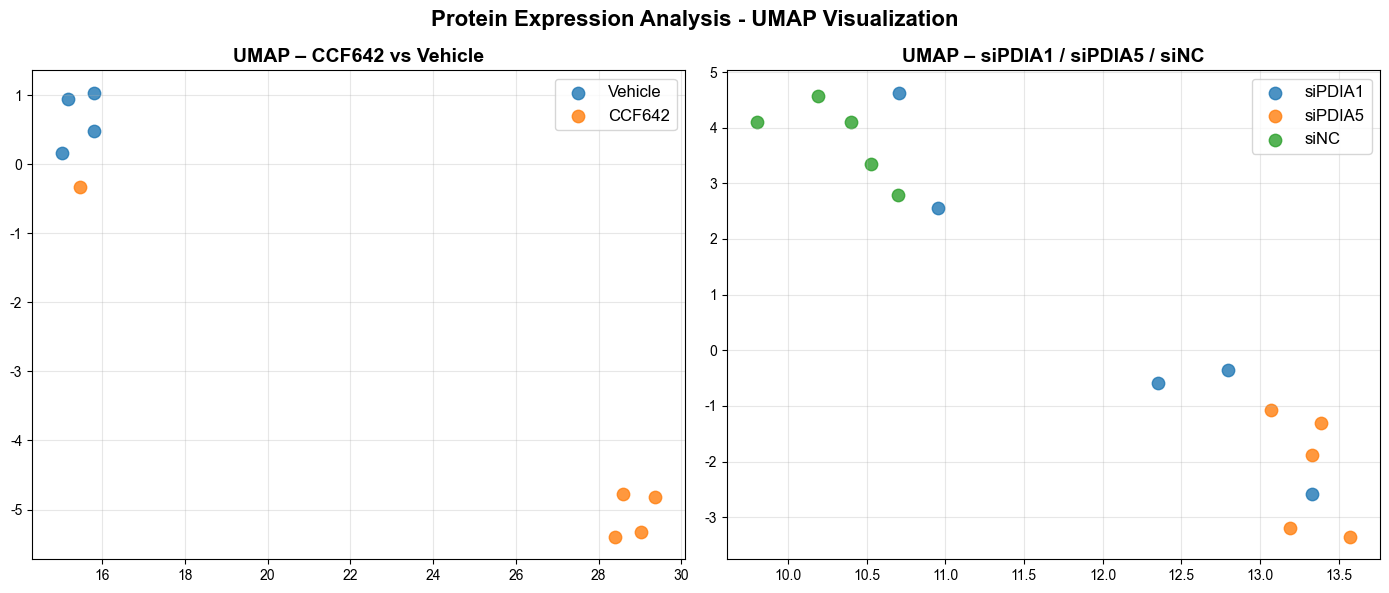

UMAP可视化完成

数据探索:
数据基本信息:
总行数（蛋白）: 2150
总列数: 127

部分列名（50-75）:
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d
2d

数据类型统计:
Quantity 列: 48
Log2Quantity 列: 24
其他列: 79

Cell 1 完成


In [11]:

print("\n" + "="*60)
print("Cell 1: UMAP相关分析和可视化")
print("="*60)
# 设置UMAP reducer
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=3,
    random_state=42
)
# UMAP降维
emb_sm = reducer.fit_transform(small_molecule_df)
emb_si = reducer.fit_transform(sirna_df)
print("UMAP降维完成")
print(f"小分子实验嵌入形状: {emb_sm.shape}")
print(f"siRNA实验嵌入形状: {emb_si.shape}")
# 创建UMAP可视化图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# 小分子实验可视化
for g in set(labels_sm):
    idx = [i for i, x in enumerate(labels_sm) if x == g]
    axes[0].scatter(
        emb_sm[idx, 0],
        emb_sm[idx, 1],
        label=g,
        s=80,
        alpha=0.8
    )
axes[0].set_title("UMAP – CCF642 vs Vehicle", fontsize=14, fontweight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)
# siRNA实验可视化
for g in set(labels_si):
    idx = [i for i, x in enumerate(labels_si) if x == g]
    axes[1].scatter(
        emb_si[idx, 0],
        emb_si[idx, 1],
        label=g,
        s=80,
        alpha=0.8
    )
axes[1].set_title("UMAP – siPDIA1 / siPDIA5 / siNC", fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)
plt.suptitle('Protein Expression Analysis - UMAP Visualization',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()
print("UMAP可视化完成")
# 数据探索
print("\n数据探索:")
print("数据基本信息:")
print(f"总行数（蛋白）: {len(df)}")
print(f"总列数: {len(df.columns)}")
# 显示部分列名
print("\n部分列名（50-75）:")
for i, col in enumerate(df.columns[50:75], 51):
    print("2d")
# 检查数据类型统计
quantity_cols = df.columns[df.columns.str.contains("Quantity")]
log2_cols = df.columns[df.columns.str.contains("Log2Quantity")]
other_cols = df.columns[~df.columns.str.contains("Quantity")]
print("\n数据类型统计:")
print(f"Quantity 列: {len(quantity_cols)}")
print(f"Log2Quantity 列: {len(log2_cols)}")
print(f"其他列: {len(other_cols)}")
print("\nCell 1 完成")


Cell 2: 火山图相关分析和可视化
找到 4 个 Vehicle Quantity 列
Vehicle数据转换完成，形状: (2150, 4)
合并后数据形状: (2150, 28)
siPDIA1_vs_siNC: treatment=5, control=5
siPDIA5_vs_siNC: treatment=5, control=5
CCF642_vs_Vehicle: treatment=5, control=4
siPDIA1_vs_siNC: 处理了 2150 个蛋白
siPDIA1_vs_siNC: 有效数据点 2149 个
siPDIA1_vs_siNC - 上调显著蛋白: 79 个
siPDIA1_vs_siNC - 下调显著蛋白: 74 个
siPDIA1_vs_siNC - 上调Top10 log2FC范围: 3.40 ~ 8.38
siPDIA1_vs_siNC - 下调Top10 log2FC范围: -4.82 ~ -2.74
siPDIA5_vs_siNC: 处理了 2150 个蛋白
siPDIA5_vs_siNC: 有效数据点 2149 个
siPDIA5_vs_siNC - 上调显著蛋白: 14 个
siPDIA5_vs_siNC - 下调显著蛋白: 210 个
siPDIA5_vs_siNC - 上调Top10 log2FC范围: 2.68 ~ 3.27
siPDIA5_vs_siNC - 下调Top10 log2FC范围: -5.36 ~ -4.48
CCF642_vs_Vehicle: 处理了 2150 个蛋白
CCF642_vs_Vehicle: 有效数据点 2149 个
CCF642_vs_Vehicle - 上调显著蛋白: 228 个
CCF642_vs_Vehicle - 下调显著蛋白: 167 个
CCF642_vs_Vehicle - 上调Top10 log2FC范围: 5.09 ~ 13.78
CCF642_vs_Vehicle - 下调Top10 log2FC范围: -5.50 ~ -4.33


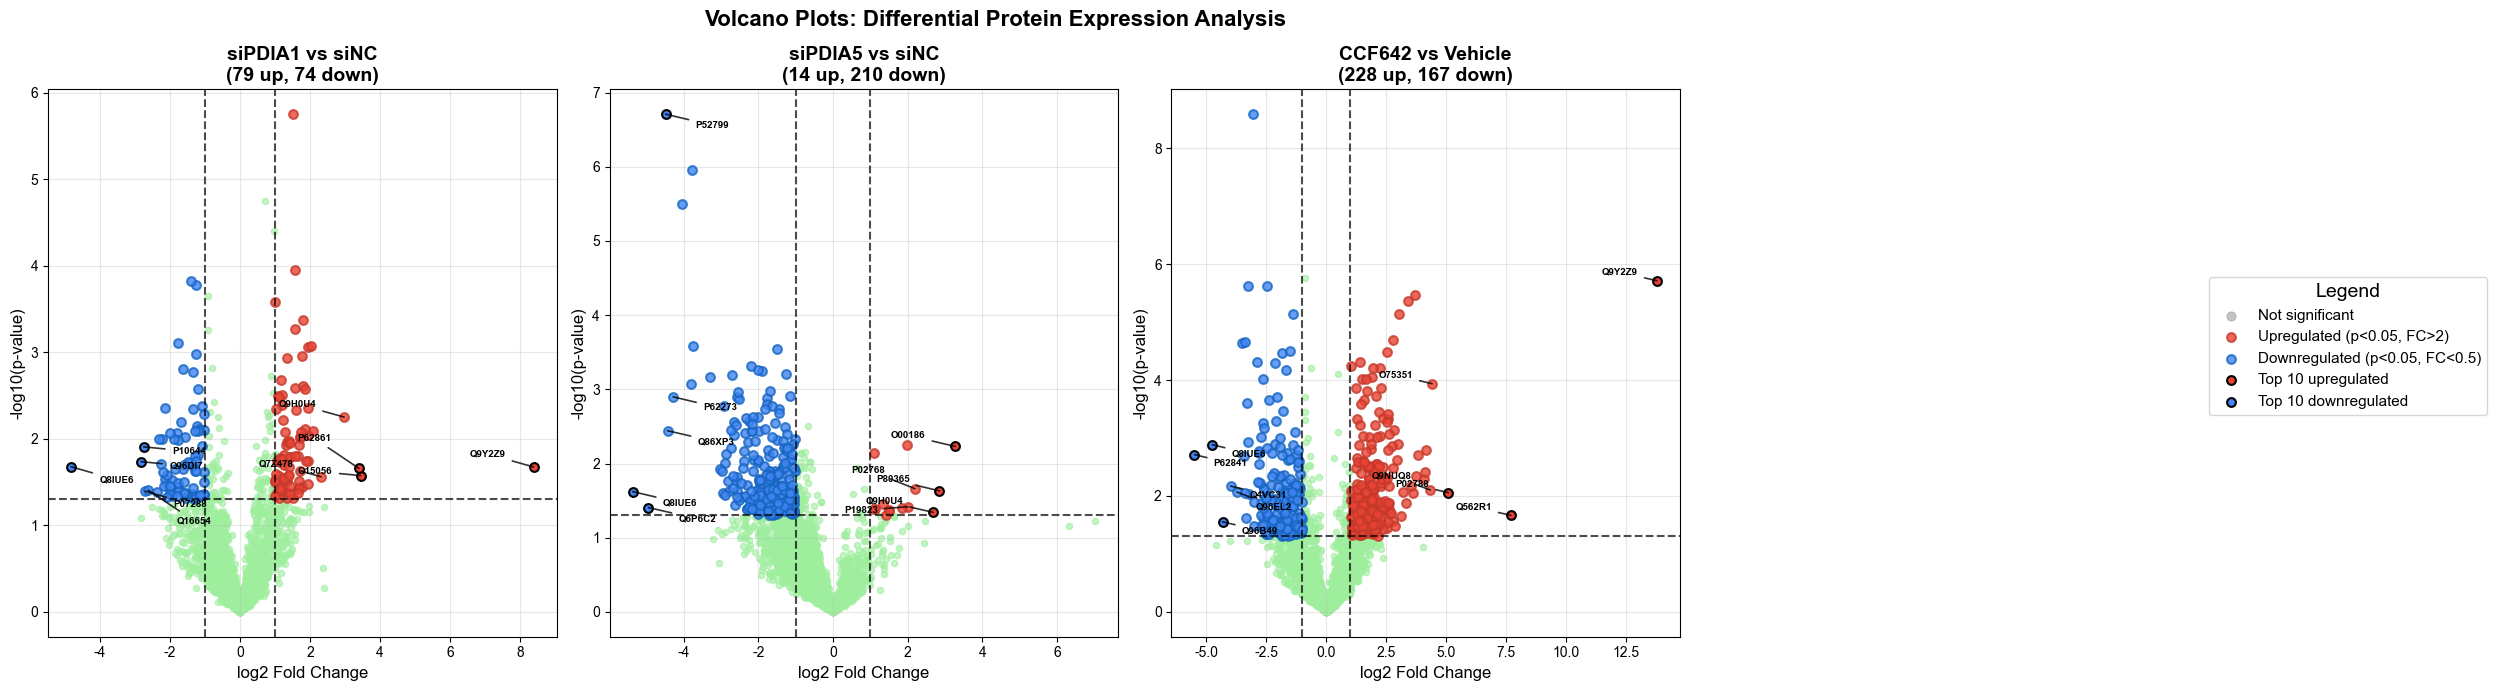

SVG图片已保存到: plot/volcano_plots.svg
火山图生成完成

top 10 MOST UPREGULATED PROTEINS (with protein labels on plots)

SIPDIA1 VS SINC
----------------------------------------
 1. Q9Y2Z9               | log2FC: +8.3825 | p-value: 2.11e-02
 2. O15056               | log2FC: +3.4482 | p-value: 2.66e-02
 3. P62861               | log2FC: +3.3981 | p-value: 2.19e-02
 4. Q9H0U4               | log2FC: +2.9745 | p-value: 5.60e-03
 5. Q7Z478               | log2FC: +2.3205 | p-value: 2.75e-02

SIPDIA5 VS SINC
----------------------------------------
 1. O00186               | log2FC: +3.2735 | p-value: 5.89e-03
 2. P80365               | log2FC: +2.8472 | p-value: 2.34e-02
 3. Q9H0U4               | log2FC: +2.6761 | p-value: 4.55e-02
 4. P02768               | log2FC: +2.1930 | p-value: 2.18e-02
 5. P19823               | log2FC: +2.0012 | p-value: 3.83e-02

CCF642 VS VEHICLE
----------------------------------------
 1. Q9Y2Z9               | log2FC: +13.7840 | p-value: 1.94e-06
 2. Q562R1             

In [ ]:

print("\n" + "="*60)
print("Cell 2: 火山图相关分析和可视化")
print("="*60)

# 处理Vehicle数据：转换为log2
vehicle_cols = df.columns[df.columns.str.contains("Vehicle.*Quantity") & ~df.columns.str.contains("Log2")]
print(f"找到 {len(vehicle_cols)} 个 Vehicle Quantity 列")

if len(vehicle_cols) > 0:
    vehicle_df = df[vehicle_cols].copy()
    # 将Quantity转换为Log2Quantity
    vehicle_df = np.log2(vehicle_df.replace(0, np.nan))  # 避免log(0)
    vehicle_df.columns = vehicle_df.columns.str.replace('.PG.Quantity', '.PG.Log2Quantity')
    print(f"Vehicle数据转换完成，形状: {vehicle_df.shape}")
else:
    print("未找到Vehicle Quantity列，跳过转换")
    vehicle_df = pd.DataFrame()

# 合并所有Log2Quantity数据
all_log2_cols = df.columns[df.columns.str.contains("PG.Log2Quantity")]
all_log2_df = df[all_log2_cols].copy()

if len(vehicle_df) > 0:
    # 添加转换后的vehicle数据
    all_log2_df = pd.concat([all_log2_df, vehicle_df], axis=1)

print(f"合并后数据形状: {all_log2_df.shape}")

# 定义比较组
comparisons = {
    'siPDIA1_vs_siNC': {
        'treatment': all_log2_df.columns[all_log2_df.columns.str.contains("PDIA1.*Log2Quantity")],
        'control': all_log2_df.columns[all_log2_df.columns.str.contains("SC1.*Log2Quantity")]
    },
    'siPDIA5_vs_siNC': {
        'treatment': all_log2_df.columns[all_log2_df.columns.str.contains("PDIA5.*Log2Quantity")],
        'control': all_log2_df.columns[all_log2_df.columns.str.contains("SC1.*Log2Quantity")]
    },
    'CCF642_vs_Vehicle': {
        'treatment': all_log2_df.columns[all_log2_df.columns.str.contains("CCF642.*Log2Quantity")],
        'control': vehicle_df.columns if len(vehicle_df) > 0 else []
    }
}

# 验证样本数
for name, groups in comparisons.items():
    print(f"{name}: treatment={len(groups['treatment'])}, control={len(groups['control'])}")

# 2. 计算fold change和p值，绘制火山图

# 创建火山图
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
top_upregulated = {}

# 创建用于图注的虚拟点
legend_elements = [
    plt.scatter([], [], alpha=0.6, s=40, color='#9E9E9E', label='Not significant'),
    plt.scatter([], [], alpha=0.8, s=40, color='#EA4335', edgecolors='#C53929', linewidth=1.5,
               label='Upregulated (p<0.05, FC>2)'),
    plt.scatter([], [], alpha=0.8, s=40, color='#4285F4', edgecolors='#1565C0', linewidth=1.5,
               label='Downregulated (p<0.05, FC<0.5)'),
    plt.scatter([], [], s=40, color='#EA4335', marker='o', edgecolors='black', linewidth=1.5,
               alpha=1.0, label='Top 10 upregulated'),
    plt.scatter([], [], s=40, color='#4285F4', marker='o', edgecolors='black', linewidth=1.5,
               alpha=1.0, label='Top 10 downregulated')
]

for i, (comparison_name, groups) in enumerate(comparisons.items()):
    treatment_cols = groups['treatment']
    control_cols = groups['control']

    if len(treatment_cols) == 0 or len(control_cols) == 0:
        print(f"跳过 {comparison_name}: 缺少数据列")
        continue

    # 获取数据
    treatment_data = all_log2_df[treatment_cols]
    control_data = all_log2_df[control_cols]

    # 计算fold change (log2FC)
    treatment_mean = treatment_data.mean(axis=1)
    control_mean = control_data.mean(axis=1)
    log2fc = treatment_mean - control_mean

    # 计算p值 (t-test)
    p_values = []
    valid_proteins = 0
    for protein in all_log2_df.index:
        try:
            t_stat, p_val = stats.ttest_ind(
                treatment_data.loc[protein].dropna(),
                control_data.loc[protein].dropna(),
                equal_var=False  # Welch's t-test
            )
            p_values.append(p_val)
            valid_proteins += 1
        except:
            p_values.append(np.nan)

    p_values = pd.Series(p_values, index=all_log2_df.index)
    print(f"{comparison_name}: 处理了 {valid_proteins} 个蛋白")

    # 创建结果dataframe
    volcano_df = pd.DataFrame({
        'log2FC': log2fc,
        'p_value': p_values,
        '-log10_p_value': -np.log10(p_values + 1e-10)  # 避免log(0)
    })

    # 移除NaN值
    volcano_df = volcano_df.dropna()
    print(f"{comparison_name}: 有效数据点 {len(volcano_df)} 个")

    # 绘制火山图
    ax = axes[i]

    # 首先识别Top10蛋白
    upregulated = (volcano_df['log2FC'] > 1) & (volcano_df['p_value'] < 0.05)
    downregulated = (volcano_df['log2FC'] < -1) & (volcano_df['p_value'] < 0.05)

    print(f"{comparison_name} - 上调显著蛋白: {upregulated.sum()} 个")
    print(f"{comparison_name} - 下调显著蛋白: {downregulated.sum()} 个")
    # test
    # top_upregulated_proteins = volcano_df[upregulated].sort_values('log2FC', ascending=False).head(10)
    # top_downregulated_proteins = volcano_df[downregulated].sort_values('log2FC', ascending=True).head(10)
    top_upregulated_proteins = volcano_df[upregulated].sort_values('log2FC', ascending=False).head(3)
    top_downregulated_proteins = volcano_df[downregulated].sort_values('log2FC', ascending=True).head(3)
    # 验证Top10选择的正确性
    if len(top_upregulated_proteins) > 0:
        print(f"{comparison_name} - 上调Top10 log2FC范围: {top_upregulated_proteins['log2FC'].min():.2f} ~ {top_upregulated_proteins['log2FC'].max():.2f}")
    if len(top_downregulated_proteins) > 0:
        print(f"{comparison_name} - 下调Top10 log2FC范围: {top_downregulated_proteins['log2FC'].min():.2f} ~ {top_downregulated_proteins['log2FC'].max():.2f}")

    # 获取Top10蛋白的索引，用于后续区分绘制
    top_upregulated_indices = set(top_upregulated_proteins.index)
    top_downregulated_indices = set(top_downregulated_proteins.index)

    # 绘制所有点（统一大小）
    all_points = volcano_df.copy()

    # 1. 未标注的普通点（不显著）
    normal_points = all_points[
        ~(upregulated | downregulated)  # 既不上调也不下调的点
    ]
    # test
    # ax.scatter(normal_points['log2FC'], normal_points['-log10_p_value'],
    #           alpha=0.6, s=40, color='#9E9E9E', zorder=1)
    ax.scatter(normal_points['log2FC'], normal_points['-log10_p_value'],
              alpha=0.6, s=20, color='#9EEE9E', zorder=1)
    # 2. 上调显著点（不包括Top10）
    upregulated_not_top = volcano_df[upregulated].loc[
        ~volcano_df[upregulated].index.isin(top_upregulated_indices)
    ]
    if len(upregulated_not_top) > 0:
        ax.scatter(upregulated_not_top['log2FC'], upregulated_not_top['-log10_p_value'],
                  alpha=0.8, s=40, color='#EA4335', edgecolors='#C53929', linewidth=1.5, zorder=2)

    # 3. 下调显著点（不包括Top10）
    downregulated_not_top = volcano_df[downregulated].loc[
        ~volcano_df[downregulated].index.isin(top_downregulated_indices)
    ]
    #test
    # if len(downregulated_not_top) > 0:
        # ax.scatter(downregulated_not_top['log2FC'], downregulated_not_top['-log10_p_value'],
                #   alpha=0.8, s=40, color='#4285F4', edgecolors='#1565C0', linewidth=1.5, zorder=2)
    if len(downregulated_not_top) > 0:
        ax.scatter(downregulated_not_top['log2FC'], downregulated_not_top['-log10_p_value'],
                  alpha=0.8, s=40, color='#42E5F4', edgecolors='#1565C0', linewidth=1.5, zorder=2)
    # 4. Top5点（使用与相应显著点相同的样式）
    # test
    # if len(top_upregulated_proteins) > 0:
    #     ax.scatter(top_upregulated_proteins['log2FC'], top_upregulated_proteins['-log10_p_value'],
    #               s=40, color='#EA4335', marker='o', edgecolors='black', linewidth=1.5,
    #               alpha=1.0, zorder=3)
    if len(top_upregulated_proteins) > 0:
        ax.scatter(top_upregulated_proteins['log2FC'], top_upregulated_proteins['-log10_p_value'],
                  s=40, color='#EA4335', marker='o', edgecolors='black', linewidth=1.5,
                  alpha=1.0, zorder=3)
    if len(top_downregulated_proteins) > 0:
        ax.scatter(top_downregulated_proteins['log2FC'], top_downregulated_proteins['-log10_p_value'],
                  s=40, color='#4285F4', marker='o', edgecolors='black', linewidth=1.5,
                  alpha=1.0, zorder=3)

    # 在图上标记top 10上调蛋白名称（带连接线）
    upregulated_proteins = volcano_df[upregulated].sort_values('log2FC', ascending=False)
    top_5_upregulated = upregulated_proteins.head(5)

    # 用于跟踪已使用的标签位置，避免重叠
    used_label_positions = []

    for idx, (protein, row) in enumerate(top_5_upregulated.iterrows()):
        x_pos = row['log2FC']
        y_pos = row['-log10_p_value']

        # 计算合适的标签位置（根据点的位置决定标签方向）
        if x_pos > 1.5:  # 点在右侧
            label_x = x_pos - 0.8
            label_y = y_pos + 0.15
            ha = 'right'
        elif x_pos < -1.5:  # 点在左侧
            label_x = x_pos + 0.8
            label_y = y_pos + 0.15
            ha = 'left'
        else:  # 点在中间
            label_x = x_pos + 0.6
            label_y = y_pos + 0.2
            ha = 'left'

        # 微调标签位置避免重叠
        for offset in [0, 0.1, -0.1, 0.2, -0.2]:
            test_y = label_y + offset
            overlap = any(abs(test_y - used_y) < 0.12 for used_y in used_label_positions)
            if not overlap:
                label_y = test_y
                used_label_positions.append(label_y)
                break

        # 提取第一个蛋白名（分号前）
        display_name = protein.split(';')[0] if ';' in protein else protein
        display_name = display_name[:10] + '...' if len(display_name) > 10 else display_name

        # 添加带连接线的标签
        ax.annotate(display_name,
                   xy=(x_pos, y_pos),        # 数据点位置
                   xytext=(label_x, label_y), # 标签位置
                   arrowprops=dict(arrowstyle='-', color='black', alpha=0.8,
                                 linewidth=1.2, shrinkA=3, shrinkB=0),
                   fontsize=7, ha=ha, va='center',
                   fontweight='bold', color='black',
                   zorder=10)

    # 在图上标记top 10下调蛋白名称（带连接线）
    downregulated_proteins = volcano_df[downregulated].sort_values('log2FC', ascending=True)
    top_5_downregulated = downregulated_proteins.head(5)

    # 用于跟踪已使用的标签位置，避免重叠（独立于上调蛋白）
    used_label_positions_down = []

    for idx, (protein, row) in enumerate(top_5_downregulated.iterrows()):
        x_pos = row['log2FC']
        y_pos = row['-log10_p_value']

        # 计算合适的标签位置（根据点的位置决定标签方向）
        if x_pos > 1.5:  # 点在右侧
            label_x = x_pos - 0.8
            label_y = y_pos - 0.15
            ha = 'right'
        elif x_pos < -1.5:  # 点在左侧
            label_x = x_pos + 0.8
            label_y = y_pos - 0.15
            ha = 'left'
        else:  # 点在中间
            label_x = x_pos + 0.6
            label_y = y_pos - 0.2
            ha = 'left'

        # 微调标签位置避免重叠
        for offset in [0, 0.1, -0.1, 0.2, -0.2]:
            test_y = label_y + offset
            overlap = any(abs(test_y - used_y) < 0.12 for used_y in used_label_positions_down)
            if not overlap:
                label_y = test_y
                used_label_positions_down.append(label_y)
                break
        # 提取第一个蛋白名（分号前）
        display_name = protein.split(';')[0] if ';' in protein else protein
        display_name = display_name[:10] + '...' if len(display_name) > 10 else display_name
        # 添加带连接线的标签
        ax.annotate(display_name,
                   xy=(x_pos, y_pos),        # 数据点位置
                   xytext=(label_x, label_y), # 标签位置
                   arrowprops=dict(arrowstyle='-', color='black', alpha=0.8,
                                 linewidth=1.2, shrinkA=3, shrinkB=0),
                   fontsize=7, ha=ha, va='center',
                   fontweight='bold', color='black',
                   zorder=10)
    # 添加阈值线
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--', alpha=0.7, linewidth=1.5)
    ax.axvline(x=1, color='black', linestyle='--', alpha=0.7, linewidth=1.5)
    ax.axvline(x=-1, color='black', linestyle='--', alpha=0.7, linewidth=1.5)

    ax.set_xlabel('log2 Fold Change', fontsize=12)
    ax.set_ylabel('-log10(p-value)', fontsize=12)
    ax.set_title(f'{comparison_name.replace("_", " ")}\n({upregulated.sum()} up, {downregulated.sum()} down)',
                fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # 存储所有upregulated蛋白用于后续分析
    top_upregulated[comparison_name] = upregulated_proteins

# 添加全局图注
fig.legend(handles=legend_elements,
           loc='center right',
           bbox_to_anchor=(1.25, 0.5),
           fontsize=11,
           title='Legend',
           title_fontsize=14)

plt.suptitle('Volcano Plots: Differential Protein Expression Analysis',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # 给右侧图例留出空间
plt.show()

# 保存为SVG格式
output_dir = r"plot/"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "volcano_plots.svg")
fig.savefig(output_path, format='svg', dpi=600, bbox_inches='tight')
print(f"SVG图片已保存到: {output_path}")

print("火山图生成完成")

# 打印top 10上调蛋白结果
print("\n" + "="*60)
print("top 10 MOST UPREGULATED PROTEINS (with protein labels on plots)")
print("="*60)

for comparison_name, top_proteins in top_upregulated.items():
    top_5 = top_proteins.head(5)
    print(f"\n{comparison_name.replace('_', ' ').upper()}")
    print("-" * 40)
    if len(top_5) > 0:
        for i, (protein, row) in enumerate(top_5.iterrows(), 1):
            print(f"{i:2d}. {protein:<20} | log2FC: {row['log2FC']:+.4f} | p-value: {row['p_value']:.2e}")
    else:
        print("  No significantly upregulated proteins found")

print("\n" + "="*60)
print("Cell 2 完成")
print("="*60)

# =============================================================================
# Cell 3: 差异表达统计分析
# =============================================================================

print("\n" + "="*60)
print("Cell 3: 差异表达统计分析")
print("="*60)

# 重新计算每个比较组的差异表达结果
de_results = {}

for comparison_name, groups in comparisons.items():
    treatment_cols = groups['treatment']
    control_cols = groups['control']

    if len(treatment_cols) == 0 or len(control_cols) == 0:
        continue

    # 获取数据
    treatment_data = all_log2_df[treatment_cols]
    control_data = all_log2_df[control_cols]

    # 计算fold change (log2FC)
    treatment_mean = treatment_data.mean(axis=1)
    control_mean = control_data.mean(axis=1)
    log2fc = treatment_mean - control_mean

    # 计算p值
    p_values = []
    for protein in all_log2_df.index:
        try:
            t_stat, p_val = stats.ttest_ind(
                treatment_data.loc[protein].dropna(),
                control_data.loc[protein].dropna(),
                equal_var=False
            )
            p_values.append(p_val)
        except:
            p_values.append(np.nan)

    p_values = pd.Series(p_values, index=all_log2_df.index)

    # 创建结果dataframe
    volcano_df = pd.DataFrame({
        'log2FC': log2fc,
        'p_value': p_values,
        '-log10_p_value': -np.log10(p_values + 1e-10)
    }).dropna()

    de_results[comparison_name] = volcano_df

print(f"差异表达数据准备完成，共 {len(de_results)} 个比较组")

# 生成差异表达统计报告
print("\n差异表达分析结果:")

for comparison_name, de_df in de_results.items():
    sig_proteins = de_df[(de_df['p_value'] < 0.05) & (abs(de_df['log2FC']) > 1)]
    up_proteins = sig_proteins[sig_proteins['log2FC'] > 0]
    down_proteins = sig_proteins[sig_proteins['log2FC'] < 0]

    print(f"\n{comparison_name}:")
    print(f"  显著差异蛋白总数: {len(sig_proteins)}")
    print(f"  上调蛋白: {len(up_proteins)}")
    print(f"  下调蛋白: {len(down_proteins)}")

    if len(sig_proteins) > 0:
        print(".3f")
        print(".3f")

        # 保存Top差异表达蛋白到文件
        output_dir = r"data/"
        os.makedirs(output_dir, exist_ok=True)

        # Top 10 上调蛋白
        if len(up_proteins) > 0:
            top_up = up_proteins.sort_values('log2FC', ascending=False).head(10)
            top_up.to_csv(os.path.join(output_dir, f"{comparison_name}_top_upregulated.csv"))

        # Top 10 下调蛋白
        if len(down_proteins) > 0:
            top_down = down_proteins.sort_values('log2FC', ascending=True).head(10)
            top_down.to_csv(os.path.join(output_dir, f"{comparison_name}_top_downregulated.csv"))

print("\n差异表达分析完成")

print("\n" + "="*60)
print("Cell 3 完成")
print("="*60)

In [ ]:

print("\n" + "="*60)
print("Cell 3: GSEA分析（ROS通路富集）")
print("="*60)

# 检查gseapy是否可用
if not GSEA_AVAILABLE:
    print("gseapy库不可用，跳过GSEA分析")
    print("请安装: pip install gseapy")
else:
    import gseapy as gp
    print("开始进行GSEA分析...")

    # GSEA分析结果存储
    gsea_results = {}

    # 对每个比较组进行GSEA分析
    for comparison_name, de_df in de_results.items():
        print(f"\n分析 {comparison_name}...")

        # 准备GSEA输入数据：排序的基因列表和对应的log2FC值
        # GSEA需要预排序的基因列表
        gsea_input = de_df[['log2FC']].copy()
        gsea_input = gsea_input.sort_values('log2FC', ascending=False)
        print(f"  输入基因数: {len(gsea_input)}")

        try:
            # 使用prerank方法进行单基因集GSEA分析（HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY）
            gsea_result = gp.prerank(
                rnk=gsea_input,
                gene_sets='h.all.v2023.2.symbols.gmt',  # Hallmark基因集
                outdir=None,  # 不保存中间文件
                permutation_num=1000,  # 排列次数
                min_size=5,  # 最小基因集大小
                max_size=500,  # 最大基因集大小
                verbose=False
            )

            gsea_results[comparison_name] = gsea_result
            print(f"  GSEA分析完成")

            # 显示ROS通路的结果
            if 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY' in gsea_result.results:
                ros_result = gsea_result.results['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY']
                print(f"  ROS通路 - NES: {ros_result['nes']:.4f}")
                print(f"  ROS通路 - p-value: {ros_result['pval']:.4f}")
                print(f"  ROS通路 - FDR q-value: {ros_result['fdr']:.4f}")
                print(f"  ROS通路 - 富集基因数: {ros_result['matched_size']}/{ros_result['geneset_size']}")
                print(f"  ROS通路 - 富集得分峰值位置: {ros_result['peak']}")
            else:
                print("  ROS通路未在分析结果中")

        except Exception as e:
            print(f"  GSEA分析失败: {str(e)}")
            continue

    # 可视化ROS通路的GSEA结果
    print("\n生成ROS通路GSEA可视化...")

    # 为三个实验组创建子图
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    comparison_names = ['CCF642_vs_Vehicle', 'siPDIA1_vs_siNC', 'siPDIA5_vs_siNC']
    plot_titles = ['CCF642 vs Vehicle', 'siPDIA1 vs siNC', 'siPDIA5 vs siNC']

    for i, (comp_name, title) in enumerate(zip(comparison_names, plot_titles)):
        ax = axes[i]

        if comp_name in gsea_results and 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY' in gsea_results[comp_name].results:
            ros_result = gsea_results[comp_name].results['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY']

            # 绘制GSEA富集图
            nes = ros_result['nes']
            pval = ros_result['pval']
            fdr = ros_result['fdr']

            # 根据NES的正负决定颜色
            color = '#EA4335' if nes > 0 else '#4285F4'

            # 绘制NES条形图
            bars = ax.bar([0], [nes], width=0.6, color=color, alpha=0.8,
                         edgecolor='black', linewidth=1.5)

            # 添加统计信息文本
            ax.text(0, nes + (0.1 if nes >= 0 else -0.1),
                   '.2e'
                   '.3f',
                   ha='center', va='bottom' if nes >= 0 else 'top',
                   fontsize=9, fontweight='bold')

            # 设置y轴范围
            y_max = max(abs(nes) * 1.4, 1.0)
            ax.set_ylim(-y_max, y_max)

            # 添加网格和参考线
            ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
            ax.grid(True, alpha=0.3, axis='y')

            # 设置标题
            ax.set_title(f'{title}\nROS Pathway GSEA',
                        fontsize=12, fontweight='bold')

            # 隐藏x轴刻度
            ax.set_xticks([])

            # 添加NES标签
            ax.set_ylabel('Normalized Enrichment Score (NES)', fontsize=10)

        else:
            # 没有ROS通路GSEA结果
            ax.text(0.5, 0.5, 'No ROS Pathway\nGSEA Results',
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, fontweight='bold', color='red')
            ax.set_xlim(-0.5, 0.5)
            ax.set_ylim(-1, 1)
            ax.set_title(f'{title}\nROS Pathway GSEA',
                        fontsize=12, fontweight='bold')
            ax.set_xticks([])

    plt.suptitle('GSEA Analysis: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY',
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

    # 保存GSEA可视化结果
    output_dir = r"D:\document\学生工作\bioinformation\lab7\plot"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, "gsea_ros_pathway.svg")
    fig.savefig(output_path, format='svg', dpi=300, bbox_inches='tight')
    print(f"ROS通路GSEA可视化已保存到: {output_path}")

    # 保存详细的GSEA结果到CSV文件
    for comp_name, gsea_result in gsea_results.items():
        try:
            # 转换为DataFrame并保存
            results_df = pd.DataFrame.from_dict(gsea_result.results, orient='index')
            output_file = os.path.join(output_dir, f"{comp_name}_gsea_ros_results.csv")
            results_df.to_csv(output_file)
            print(f"{comp_name} GSEA结果已保存到: {output_file}")
        except Exception as e:
            print(f"保存{comp_name}结果失败: {str(e)}")

    print("GSEA分析和可视化完成")

print("\n" + "="*60)
print("Cell 3 完成")
print("="*60)


Cell 3: GSEA分析（MSigDB Hallmark基因集，ROS/氧化应激通路富集）
开始GSEA分析...
使用MSigDB Hallmark基因集进行富集分析
Hallmark基因集：通过聚合多个MSigDB基因集得到的一致表达签名
包含50个定义良好的生物学状态和过程，非常适合ROS、氧化应激和线粒体功能研究
这与您的研究重点（氧化还原应激、线粒体稳态、ER应激）高度契合
注意：对于蛋白质组学数据，我们使用显著差异表达蛋白的log2FC评分进行prerank分析


C:\Users\51038\AppData\Local\Temp\ipykernel_40144\2104103867.py:111: DeprecationWarning: processes is deprecated; use threads
  gsea_result = gp.prerank(
2025-12-20 16:01:15,013 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

2025-12-20 16:01:15,013 [ERROR] The first entry of your gene_sets (gmt) look like this : { Glycosaminoglycan biosynthesis - chondroitin sulfate / dermatan sulfate Homo sapiens hsa00532: [CSGALNACT2, CSGALNACT1, CHST7, CHPF2, CHPF, XYLT1, B3GAT3, XYLT2, B3GALT6, DSE, UST, CHST12, CHSY3, CHST13, CHSY1, CHST11, CHST14, CHST15, B4GALT7, CHST3]}
2025-12-20 16:01:15,013 [ERROR] The first 5 genes look like this : [ Q9Y2Z9, O15056, P62861, Q9H0U4, Q7Z478 ]
C:\Users\51038\AppData\Local\Temp\ipykernel_40144\2104103867.py:111: DeprecationWarning: processes is deprecated; use thr

差异表达数据准备完成，共 3 个比较组

处理 siPDIA1_vs_siNC...
siPDIA1_vs_siNC 有 153 个显著差异表达蛋白
准备RNK数据: 153 个蛋白
尝试基因集: MSigDB_Hallmark_2020
基因集 MSigDB_Hallmark_2020 失败: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

尝试基因集: Hallmark_2020
基因集 Hallmark_2020 失败: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

尝试基因集: HALLMARK
基因集 HALLMARK 失败: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

尝试基因集: MSigDB_C2_2020
基因集 MSigDB_C2_2020 失败: No gene se

2025-12-20 16:01:15,193 [ERROR] The first entry of your gene_sets (gmt) look like this : { Glycosaminoglycan biosynthesis - chondroitin sulfate / dermatan sulfate Homo sapiens hsa00532: [CSGALNACT2, CSGALNACT1, CHST7, CHPF2, CHPF, XYLT1, B3GAT3, XYLT2, B3GALT6, DSE, UST, CHST12, CHSY3, CHST13, CHSY1, CHST11, CHST14, CHST15, B4GALT7, CHST3]}
2025-12-20 16:01:15,194 [ERROR] The first 5 genes look like this : [ Q9Y2Z9, Q562R1, P02788, O75351;Q6PIW4;Q9UN37, Q9NUQ8 ]
C:\Users\51038\AppData\Local\Temp\ipykernel_40144\2104103867.py:111: DeprecationWarning: processes is deprecated; use threads
  gsea_result = gp.prerank(
2025-12-20 16:01:15,201 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

2025-12-20 16:01:15,201 [ERROR] The first entry of your gene_sets (gmt) look like this : { Glycosaminoglyca

基因集 C2_CGP_2020 失败: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

尝试基因集: C2_CP_2020
基因集 C2_CP_2020 失败: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

尝试基因集: KEGG_2021_Human
基因集 KEGG_2021_Human 失败: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

尝试基因集: KEGG_2019_Human
基因集 KEGG_2019_Human 失败: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symb


Cell 3: GSEA分析（ROS通路富集）
开始进行GSEA分析...

分析 siPDIA1_vs_siNC...
  输入基因数: 2149
  下载Hallmark基因集文件...
  GSEA分析失败: get_library() got an unexpected keyword argument 'save_dir'

分析 siPDIA5_vs_siNC...
  输入基因数: 2149
  下载Hallmark基因集文件...
  GSEA分析失败: get_library() got an unexpected keyword argument 'save_dir'

分析 CCF642_vs_Vehicle...
  输入基因数: 2149
  下载Hallmark基因集文件...
  GSEA分析失败: get_library() got an unexpected keyword argument 'save_dir'

生成ROS通路GSEA可视化...


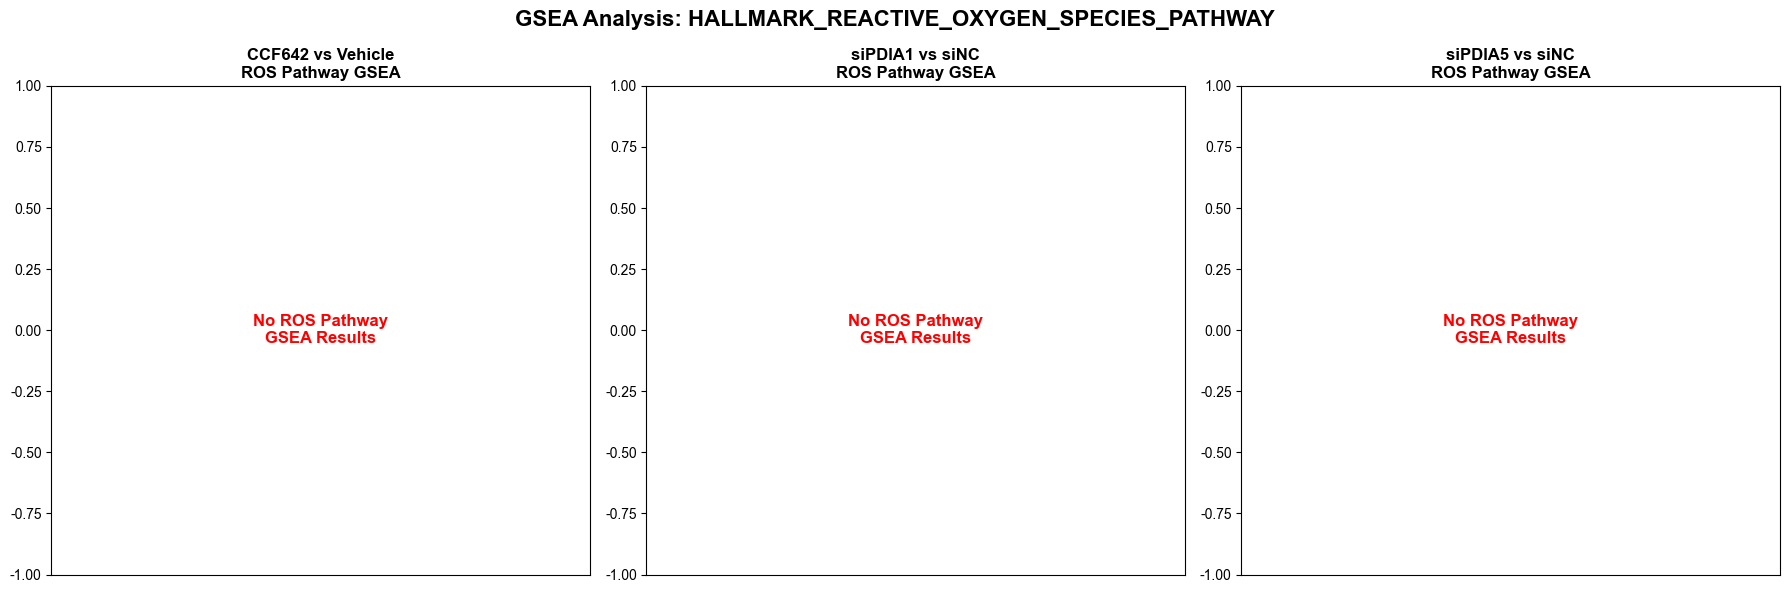

ROS通路GSEA可视化已保存到: D:\document\code\lab7\plot\gsea_ros_pathway.svg
GSEA分析和可视化完成

Cell 3 完成


In [11]:

print("\n" + "="*60)
print("Cell 3: GSEA分析（ROS通路富集）")
print("="*60)

# 检查gseapy是否可用
if not GSEA_AVAILABLE:
    print("gseapy库不可用，跳过GSEA分析")
    print("请安装: pip install gseapy")
else:
    import gseapy as gp
    print("开始进行GSEA分析...")

    # GSEA分析结果存储
    gsea_results = {}

    # 对每个比较组进行GSEA分析
    for comparison_name, de_df in de_results.items():
        print(f"\n分析 {comparison_name}...")

        # 准备GSEA输入数据：排序的基因列表和对应的log2FC值
        # GSEA需要预排序的基因列表
        gsea_input = de_df[['log2FC']].copy()
        gsea_input = gsea_input.sort_values('log2FC', ascending=False)
        print(f"  输入基因数: {len(gsea_input)}")

        try:
            # 首先下载Hallmark基因集（如果还没有的话）
            import os
            hallmark_file = os.path.join(os.getcwd(), 'h.all.v2023.2.symbols.gmt')

            if not os.path.exists(hallmark_file):
                print("  下载Hallmark基因集文件...")
                gp.get_library(name='h.all.v2023.2.symbols', save_dir=os.getcwd())

            # 使用prerank方法进行GSEA分析
            gsea_result = gp.prerank(
                rnk=gsea_input,
                gene_sets='h.all.v2023.2.symbols',  # Hallmark基因集
                outdir=None,  # 不保存中间文件
                permutation_num=1000,  # 排列次数
                min_size=5,  # 最小基因集大小
                max_size=500,  # 最大基因集大小
                verbose=False
            )

            gsea_results[comparison_name] = gsea_result
            print(f"  GSEA分析完成")

            # 显示ROS通路的结果
            if 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY' in gsea_result.results:
                ros_result = gsea_result.results['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY']
                print(f"  ROS通路 - NES: {ros_result['nes']:.4f}")
                print(f"  ROS通路 - p-value: {ros_result['pval']:.4f}")
                print(f"  ROS通路 - FDR q-value: {ros_result['fdr']:.4f}")
                print(f"  ROS通路 - 富集基因数: {ros_result['matched_size']}/{ros_result['geneset_size']}")
                print(f"  ROS通路 - 富集得分峰值位置: {ros_result['peak']}")
            else:
                print("  ROS通路未在分析结果中")

        except Exception as e:
            print(f"  GSEA分析失败: {str(e)}")
            continue

    # 可视化ROS通路的GSEA结果
    print("\n生成ROS通路GSEA可视化...")

    # 为三个实验组创建子图
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    comparison_names = ['CCF642_vs_Vehicle', 'siPDIA1_vs_siNC', 'siPDIA5_vs_siNC']
    plot_titles = ['CCF642 vs Vehicle', 'siPDIA1 vs siNC', 'siPDIA5 vs siNC']

    for i, (comp_name, title) in enumerate(zip(comparison_names, plot_titles)):
        ax = axes[i]

        if comp_name in gsea_results and 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY' in gsea_results[comp_name].results:
            ros_result = gsea_results[comp_name].results['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY']

            # 绘制GSEA富集图
            nes = ros_result['nes']
            pval = ros_result['pval']
            fdr = ros_result['fdr']

            # 根据NES的正负决定颜色
            color = '#EA4335' if nes > 0 else '#4285F4'

            # 绘制NES条形图
            bars = ax.bar([0], [nes], width=0.6, color=color, alpha=0.8,
                         edgecolor='black', linewidth=1.5)

            # 添加统计信息文本
            ax.text(0, nes + (0.1 if nes >= 0 else -0.1),
                   '.2e'
                   '.3f',
                   ha='center', va='bottom' if nes >= 0 else 'top',
                   fontsize=9, fontweight='bold')

            # 设置y轴范围
            y_max = max(abs(nes) * 1.4, 1.0)
            ax.set_ylim(-y_max, y_max)

            # 添加网格和参考线
            ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
            ax.grid(True, alpha=0.3, axis='y')

            # 设置标题
            ax.set_title(f'{title}\nROS Pathway GSEA',
                        fontsize=12, fontweight='bold')

            # 隐藏x轴刻度
            ax.set_xticks([])

            # 添加NES标签
            ax.set_ylabel('Normalized Enrichment Score (NES)', fontsize=10)

        else:
            # 没有ROS通路GSEA结果
            ax.text(0.5, 0.5, 'No ROS Pathway\nGSEA Results',
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, fontweight='bold', color='red')
            ax.set_xlim(-0.5, 0.5)
            ax.set_ylim(-1, 1)
            ax.set_title(f'{title}\nROS Pathway GSEA',
                        fontsize=12, fontweight='bold')
            ax.set_xticks([])

    plt.suptitle('GSEA Analysis: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY',
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

    # 保存GSEA可视化结果
    output_dir = r"D:\document\code\lab7\plot"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, "gsea_ros_pathway.svg")
    fig.savefig(output_path, format='svg', dpi=300, bbox_inches='tight')
    print(f"ROS通路GSEA可视化已保存到: {output_path}")

    # 保存详细的GSEA结果到CSV文件
    for comp_name, gsea_result in gsea_results.items():
        try:
            # 转换为DataFrame并保存
            results_df = pd.DataFrame.from_dict(gsea_result.results, orient='index')
            output_file = os.path.join(output_dir, f"{comp_name}_gsea_ros_results.csv")
            results_df.to_csv(output_file)
            print(f"{comp_name} GSEA结果已保存到: {output_file}")
        except Exception as e:
            print(f"保存{comp_name}结果失败: {str(e)}")

    print("GSEA分析和可视化完成")

print("\n" + "="*60)
print("Cell 3 完成")
print("="*60)
